# Dynamics of highly confined fluids

We consider a fluid confined between two parallel walls without relative movement.
One can derive an analytic solution for the linearized equations, that describe viscous dissipation and transport in these systems (see [Holey et al., 2024](https://doi.org/10.1103/PhysRevFluids.9.014203)).

In Fourier space, the time evolution of hydrodynamic modes follows

$$\rho(k, t) = \rho(k, 0) e^{-t/\tau_\parallel(k)}\left[\cos(s(k)kt) + \frac{1}{s(k)k\tau_\parallel(k)}\sin(s(k)kt)\right],$$

$$j_\parallel(k, t) = j_\parallel(k, 0) e^{-t/\tau_\parallel(k)}\left[\cos(s(k)kt) - \frac{1}{s(k)k\tau_\parallel(k)}\sin(s(k)kt)\right],$$

$$j_\perp(k, t) = j_\perp(k, 0) e^{-t/\tau_\perp(k)},$$

where $\rho(k, t)$, $j_\parallel(k, t)$, and $j_\perp(k, t)$ are the coefficients for density, longitudinal momentum ($\vec{j}\parallel\vec{k}$), and transverse momentum($\vec{j}\perp\vec{k}$), respectively, with 2D wavevector $\vec{k}$. Here we consider only one-dimensional periodic channels of length $L$ with $\vec{k}\cdot\vec{e}_x=0$, such that $k\in k_n \equiv2\pi n/L$ for $n\in\mathbb{N}$. $s$ denotes the effective sound speed in the channels, and is given by the dispersion relation

$$s(k) = \sqrt{c^2 - (\tau_\parallel(k) k)^{-2}}$$

with group velocity $c=\sqrt{dp/d\rho}$ and characteristic relaxation times

$$\tau_\parallel(k) = (\nu_\text{L} k^2 + 6\nu/h^2)^{-1},$$

$$\tau_\perp(k) = (\nu k^2 + 12\nu/h^2)^{-1}$$

in longitudinal and transverse direction, respectively. Thus, the dissipation depends on the gap height $h$ and the fluid properties, i.e. the kinematic shear viscosity $\nu=\eta/\rho$ and kinematic longitudinal viscosity $\nu_\text{L}=(4\eta/3 + \zeta)/\rho$ with shear and bulk viscosity $\eta$ and $\zeta$, respectively. Note that in the limit of very small aspect ratios $hk\ll 1$, $s$ will become complex and the density and longitudinal momentum modes become overdamped, i.e. sound propagation is suppressed. This happens at the critical wavenumber $k_\text{crit}=6\nu/h^2c$ ([Holey et al., 2023](https://doi.org/10.1103/PhysRevLett.131.084001)).

In [1]:
import numpy as np

def density_decay_underdamped(t, k, h, nuL, nu, c):
    tau = 1. / (nuL * k**2 + 6. * nu / h**2)
    s = np.sqrt(c**2 - 1. / (tau * k)**2)
    return np.exp(-t / tau) * (np.cos(s * k * t) + np.sin(s * k * t) / (s * k * tau))


def density_decay_overdamped(t, k, h, nuL, nu, c):
    tau = 1. / (nuL * k**2 + 6. * nu / h**2)
    i_s = np.sqrt(1. / (tau * k)**2 - c**2)
    return np.exp(-t / tau) * (np.cosh(i_s * k * t) + np.sinh(i_s * k * t) / (i_s * k * tau))


def momentum_decay_underdamped(t, k, h, nuL, nu, c):
    tau = 1. / (nuL * k**2 + 6. * nu / h**2)
    s = np.sqrt(c**2 - 1. / (tau * k)**2)
    return np.exp(-t / tau) * (np.cos(s * k * t) - np.sin(s * k * t) / (s * k * tau))


def momentum_decay_overdamped(t, k, h, nuL, nu, c):
    tau = 1. / (nuL * k**2 + 6. * nu / h**2)
    i_s = np.sqrt(1. / (tau * k)**2 - c**2)
    return np.exp(-t / tau) * (np.cosh(i_s * k * t) - np.sinh(i_s * k * t) / (i_s * k * tau))

Let's define some properties...

In [2]:
from GaPFlow.models.sound import eos_sound_velocity

"""
properties:
    EOS: cubic
    shear: 3.92293e-05    # N s/m^2
    bulk: 0.              # N s/m^2
    rho0: 762.8617        # kg/m^3
    a: 1.33030e-1
    b: -1.41778e2
    c: 8.35134e4
    d: -2.86532e6
"""

h = 5e-9 
L = 100 * h
shear = 3.92293e-05    # N s/m^2
bulk = 0.              # N s/m^2
rho0 =  762.8617        # kg/m^3

eos = {'EOS': 'cubic',
       'a': 1.33030e-1,
       'b': -1.41778e2,
       'c': 8.35134e4,
       'd': -2.86532e6}

nuL = (4. / 3. * shear + bulk) / rho0
nu = shear / rho0
c = eos_sound_velocity(rho0, eos)
k_crit = 6 * nu / h**2 / c 

.. and plot

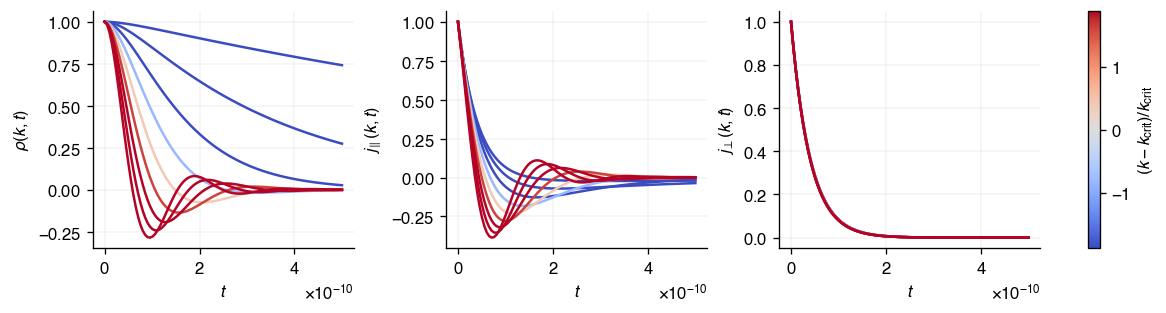

In [3]:
import GaPFlow.viz
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import CenteredNorm

sx, sy = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(1, 3, figsize=(1.75*sx, sy))

t = np.linspace(0., 5e-10, 100)

ns = np.arange(1, 10)
kns = ns * 2. * np.pi / L

for kn in kns:
    if kn < k_crit:
        rho_kt = density_decay_overdamped(t, kn, h, nuL, nu, c)
        j_long_kt = momentum_decay_overdamped(t, kn, h, nuL, nu, c)
    else:
        rho_kt = density_decay_underdamped(t, kn, h, nuL, nu, c)
        j_long_kt = momentum_decay_underdamped(t, kn, h, nuL, nu, c)

    tau_trans = 1. / (nu * kn**2 + 12. * nu / h**2)
    j_trans_kt = np.exp(-t / tau_trans)

    
    
    color = plt.cm.coolwarm((kn - k_crit) / k_crit)
    ax[0].plot(t, rho_kt, color=color)
    ax[1].plot(t, j_long_kt, color=color)
    ax[2].plot(t, j_trans_kt, color=color)

ax[0].set_ylabel(r'$\rho(k, t)$')
ax[1].set_ylabel(r'$j_\parallel(k, t)$')
ax[2].set_ylabel(r'$j_\perp(k, t)$')

ax[0].set_xlabel(r'$t$')
ax[1].set_xlabel(r'$t$')
ax[2].set_xlabel(r'$t$')

k_scale = (kns - k_crit) / k_crit
sm = ScalarMappable(CenteredNorm(vcenter=0, halfrange=k_scale.max()), cmap=plt.cm.coolwarm)
plt.colorbar(sm, ax=ax[:], label=r'$(k-k_\mathsf{crit})/k_\mathsf{crit}$');

Here, the line color illustrates the distance from the critical wave number, going from overdamped (in blue) to underdamped (in red) behavior. The shear relaxation is independent of the wave number under these conditions. Note that density and longitudinal momentum behave similar in the underdamped case (with slightly different damping), their behavior diverges at the transition to overdamped dynamics.

Let's see how this changes with the gap height (while the length stays constant):

In [4]:
def plot_relaxation(h=5e-9):
    sx, sy = plt.rcParams['figure.figsize']
    fig, ax = plt.subplots(1, 3, figsize=(1.75*sx, sy))
    
    t = np.linspace(0., 5e-10, 100)

    k_crit = 6 * nu / h**2 / c 
    
    ns = np.arange(1, 11)
    kns = ns * 2. * np.pi / L
    
    for kn in kns:
        if kn < k_crit:
            rho_kt = density_decay_overdamped(t, kn, h, nuL, nu, c)
            j_long_kt = momentum_decay_overdamped(t, kn, h, nuL, nu, c)
        else:
            rho_kt = density_decay_underdamped(t, kn, h, nuL, nu, c)
            j_long_kt = momentum_decay_underdamped(t, kn, h, nuL, nu, c)
    
        tau_trans = 1. / (nu * kn**2 + 12. * nu / h**2)
        j_trans_kt = np.exp(-t / tau_trans)
    
        color = plt.cm.coolwarm((kn - k_crit) / k_crit)
        color = plt.cm.coolwarm((kn - k_crit) / k_crit)
        ax[0].plot(t, rho_kt, color=color)
        ax[1].plot(t, j_long_kt, color=color)
        ax[2].plot(t, j_trans_kt, color=color)

    fig.suptitle(rf'$h = {h*1e9:.0f}$ nm')
    
    ax[0].set_ylabel(r'$\rho(k, t)$')
    ax[1].set_ylabel(r'$j_\parallel(k, t)$')
    ax[2].set_ylabel(r'$j_\perp(k, t)$')
    
    ax[0].set_xlabel(r'$t$')
    ax[1].set_xlabel(r'$t$')
    ax[2].set_xlabel(r'$t$')
    
    k_scale = (kns - k_crit) / k_crit
    sm = ScalarMappable(CenteredNorm(vcenter=0, halfrange=k_scale.max()), cmap=plt.cm.coolwarm)
    plt.colorbar(sm, ax=ax[:], label=r'$(k-k_\mathsf{crit})/k_\mathsf{crit}$');

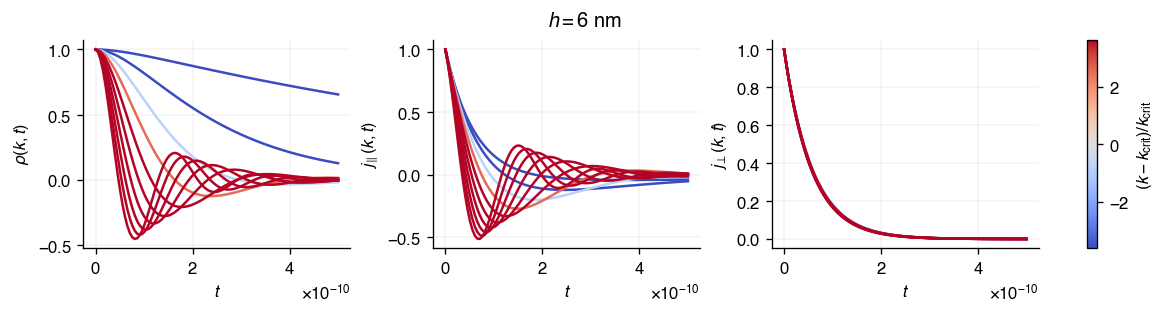

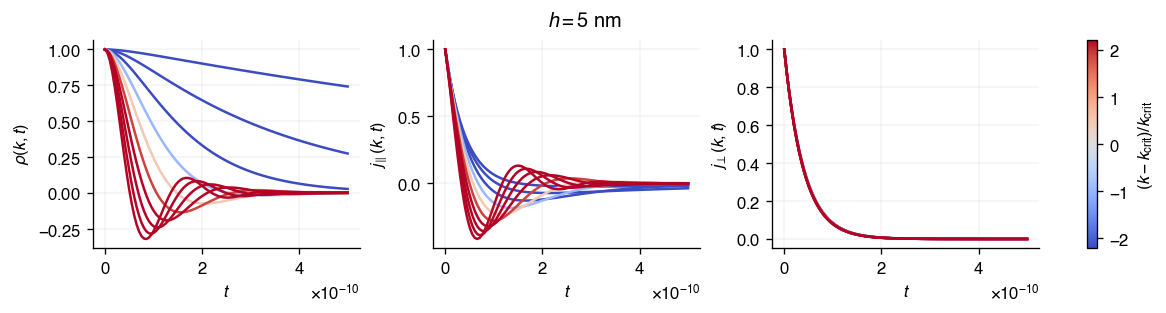

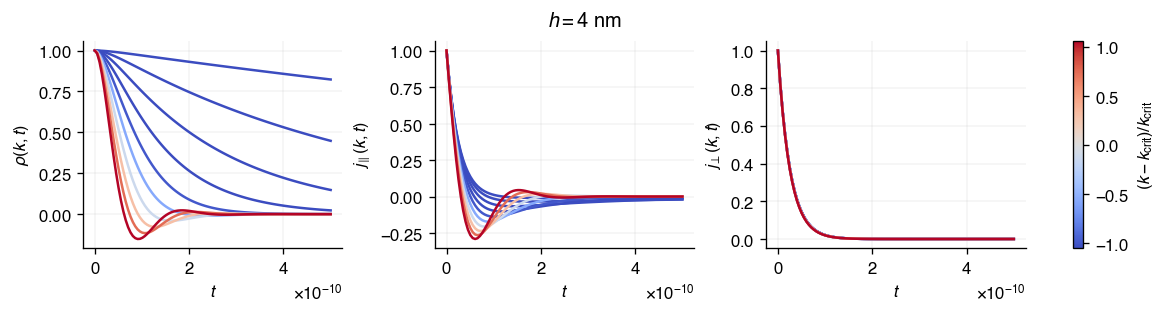

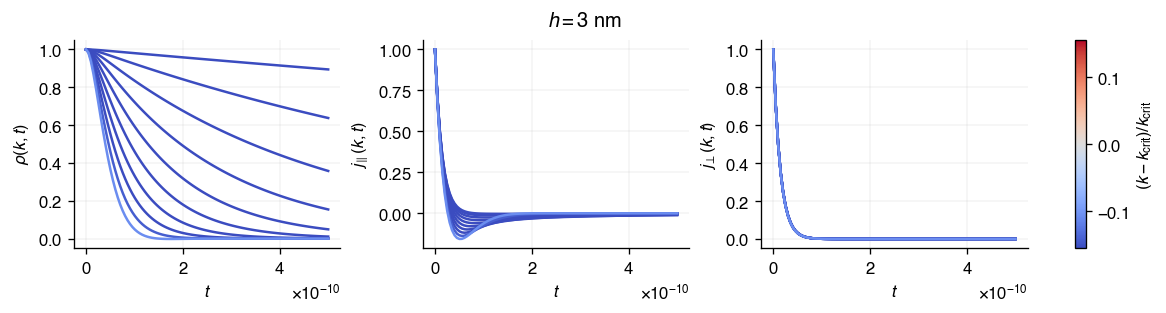

In [5]:
for h in [6e-9, 5e-9, 4e-9, 3e-9]:
    plot_relaxation(h=h)

For the smallest gap ($h=3\,\mathrm{nm}$) the modes with the ten largest wavelengths are all overdamped, while only two modes remain overdamped when doubling the gap height. The plot below shows the overdamped region can be reached in high aspect ratio channels, with critical gap heights reaching up to 200 nm for $L/h=1000$.

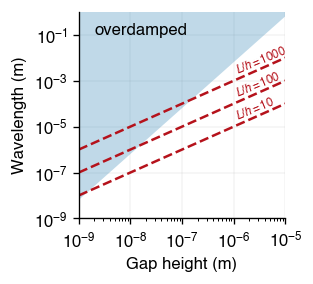

In [6]:
fig, ax = plt.subplots(1, figsize=(sy, sy))

h = np.logspace(0, 4, 100) * 1e-9
k_crit = 6 * nu / h**2 / c 

ax.fill_between(h, 2. * np.pi / k_crit, np.ones_like(h), alpha=0.3, lw=0.)
ax.text(2e-9, 1e-1, 'overdamped')

ax.plot(h, 10*h, '--', color='C1')
ax.plot(h, 100*h, '--', color='C1')
ax.plot(h, 1000*h, '--', color='C1')

ax.text(1e-6, 1.5e-3, r'$L/h=1000$', rotation=22.5, ha='left', va='bottom', fontsize=7, color='C1')
ax.text(1e-6, 1.5e-4, r'$L/h=100$', rotation=22.5, ha='left', va='bottom', fontsize=7, color='C1')
ax.text(1e-6, 1.5e-5, r'$L/h=10$', rotation=22.5, ha='left', va='bottom', fontsize=7, color='C1')

ax.set_ylim(1e-9, 1e0)
ax.set_xlim(1e-9, 1e-5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_box_aspect(1.)

ax.set_xlabel('Gap height (m)')
ax.set_ylabel('Wavelength (m)');

We can use the analytical solution to validate our simulations. Thus let's create a `GaPFlow.problem` instance with the following properties:

In [7]:
from GaPFlow.problem import Problem

sim = """
options:
    output: data/decay
    write_freq: 100
    use_tstamp: False
    silent: True
grid:
    Lx: 3.2e-7
    Ly: 1
    Nx: 256
    Ny: 1
    xE: ['P', 'P', 'P']
    xW: ['P', 'P', 'P']
    yS: ['P', 'P', 'P']
    yN: ['P', 'P', 'P']
geometry:
    type: inclined
    hmin: 5e-9
    hmax: 5e-9
    U: 0.
    V: 0.
numerics:
    adaptive: 0
    CFL: 0.5
    dt: 1e-13
    max_it: 5_000
properties:
    EOS: cubic
    shear: 3.92293e-05    # N s/m^2
    bulk: 0.              # N s/m^2
    rho0: 762.8617        # kg/m^3
    a: 1.33030e-1
    b: -1.41778e2
    c: 8.35134e4
    d: -2.86532e6
"""

Now we manually initialize the system with a shear wave as an initial condition, i.e. we set

$$j_y(x, 0) = \sin(k_n x)$$

and follow the decay. Since know that the amplitude of $j_y$ exponentially decays with a rate of $1/\tau_\perp(k)$, we can verify our numerical calculation.

*************************************************************
*                       PROBLEM SETUP                       *
*************************************************************
- options:
  - output                   : data/decay
  - write_freq               : 100
  - use_tstamp               : False
  - silent                   : True
- grid:
  - Nx                       : 256
  - Lx                       : 3.2e-07
  - dx                       : 1.25e-09
  - Ny                       : 1
  - Ly                       : 1.0
  - dy                       : 1.0
  - dim                      : 1
  - bc_xE_P                  : [True, True, True]
  - bc_xE_D                  : [False, False, False]
  - bc_xE_N                  : [False, False, False]
  - bc_xW_P                  : [True, True, True]
  - bc_xW_D                  : [False, False, False]
  - bc_xW_N                  : [False, False, False]
  - bc_yS_P                  : [True, True, True]
  - bc_yS_D                  : [F

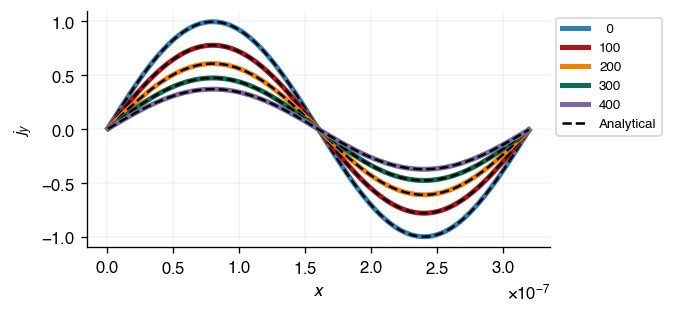

In [8]:
myProblem = Problem.from_string(sim)
myProblem.pre_run()

h = myProblem.geo['hmin']
kin_visc = myProblem.prop['shear'] / myProblem.prop['rho0']
Lx = myProblem.grid['Lx']

n = 1
kn = n * 2. * np.pi / Lx
tau = h**2 / (12 * kin_visc)
cT = myProblem.pressure.v_sound
k_crit = 6. * kin_visc / (h**2 * cT)
x = myProblem.topo.x[1:-1, 1]

# Let's initialize the system with a shear wave
myProblem.q[2, 1:-1, :] = np.sin(kn * x)[:, None]
# Manually set initial knietic energy to avoid zero division
myProblem.kinetic_energy_old = myProblem.kinetic_energy

# Now we evolove for a couple of steps
fig, ax = plt.subplots(1)
for i in range(500):
    myProblem.update()
    if i % 100 == 0:
        jy_ana = np.sin(kn * x) * np.exp(-myProblem.simtime / tau)
        jy_num = myProblem.q[2, 1:-1, 1]
        ax.plot(x, jy_num, lw=3, label=f'{i:3d}')
        ax.plot(x, jy_ana, '--', color='0.0')


ax.plot([], [], '--', color='0.0', label='Analytical')

ax.set_xlabel('$x$')
ax.set_ylabel(r'$j_y$')
ax.legend(ncol=2)
ax.legend(ncol=1, bbox_to_anchor=(1., 1.), loc=2);

This looks good. Let's also check for longitudinal momentum:

*************************************************************
*                       PROBLEM SETUP                       *
*************************************************************
- options:
  - output                   : data/decay
  - write_freq               : 100
  - use_tstamp               : False
  - silent                   : True
- grid:
  - Nx                       : 256
  - Lx                       : 3.2e-07
  - dx                       : 1.25e-09
  - Ny                       : 1
  - Ly                       : 1.0
  - dy                       : 1.0
  - dim                      : 1
  - bc_xE_P                  : [True, True, True]
  - bc_xE_D                  : [False, False, False]
  - bc_xE_N                  : [False, False, False]
  - bc_xW_P                  : [True, True, True]
  - bc_xW_D                  : [False, False, False]
  - bc_xW_N                  : [False, False, False]
  - bc_yS_P                  : [True, True, True]
  - bc_yS_D                  : [F

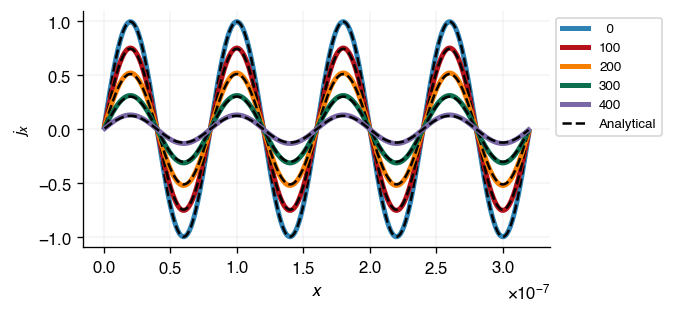

In [9]:
myProblem = Problem.from_string(sim)
myProblem.pre_run()

h = myProblem.geo['hmin']
nu = myProblem.prop['shear'] / myProblem.prop['rho0']
nuL = (4. / 3. * myProblem.prop['shear'] + myProblem.prop['bulk']) / myProblem.prop['rho0']
Lx = myProblem.grid['Lx']

n = 4 # we look at shorter wavelengths to be sure to be in the underdamped regime
kn = n * 2. * np.pi / Lx
tau = h**2 / (12 * kin_visc)
cT = myProblem.pressure.v_sound
k_crit = 6. * kin_visc / (h**2 * cT)
x = myProblem.topo.x[1:-1, 1]

# Let's initialize the system with a shear wave
myProblem.q[1, 1:-1, :] = np.sin(kn * x)[:, None]

# Manually set initial kinetic energy to avoid zero division
myProblem.kinetic_energy_old = myProblem.kinetic_energy

# Now we evolove for a couple of steps
fig, ax = plt.subplots(1)
for i in range(500):
    myProblem.update()
    if i % 100 == 0:
        jx_ana = np.sin(kn * x) * momentum_decay_underdamped(myProblem.simtime, kn, h, nuL, nu, c)
        jx_num = myProblem.q[1, 1:-1, 1]
        ax.plot(x, jx_num, lw=3, label=f'{i:3d}')
        ax.plot(x, jx_ana, '--', color='0.0')


ax.plot([], [], '--', color='0.0', label='Analytical')

ax.set_xlabel('$x$')
ax.set_ylabel(r'$j_x$')
ax.legend(ncol=1, bbox_to_anchor=(1., 1.), loc=2);